In [ ]:
Task-2:Exploratory Data Analysis(EDA)&Business Intelligence

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Load cleaned dataset from Task 1
df = pd.read_csv("cleaned_dataset.csv")

df.head()


,Customer_ID,Customer_Name,Gender,Date_of_Birth,City,Product_Category,Purchase_Date,Sales_Amount,Quantity,Payment_Mode,Customer_Age
0,101,Rahul Sharma,M,1999-05-12,Delhi,Electronics,2024-01-15,45000.0,1,Credit Card,27
1,102,Anita Verma,F,2000-08-25,Mumbai,Clothing,2024-01-18,3200.0,2,UPI,26
2,104,Priya Singh,F,2001-03-14,Kolkata,Electronics,2024-01-22,38000.0,1,Debit Card,25
3,105,Amit Patel,M,1997-07-30,Ahmedabad,Furniture,2024-01-25,15000.0,1,Credit Card,29
4,106,Neha Reddy,F,2002-01-22,Hyderabad,Clothing,2024-01-28,2800.0,2,UPI,24


In [11]:
df.describe()


,Customer_ID,Sales_Amount,Quantity,Customer_Age
count,9.000000,9.000000,9.000000,9.00000
mean,105.777778,21689.444444,1.555556,27.00000
std,3.073181,18853.358528,0.726483,2.54951
min,101.000000,2800.000000,1.000000,24.00000
25%,104.000000,3200.000000,1.000000,25.00000
50%,106.000000,18000.000000,1.000000,27.00000
75%,108.000000,38000.000000,2.000000,29.00000
max,110.000000,52000.000000,3.000000,31.00000


In [12]:
df.describe(include="object")


,Customer_Name,Gender,Date_of_Birth,City,Product_Category,Purchase_Date,Payment_Mode
count,9,9,9,9,9,9,9
unique,9,2,8,7,4,9,4
top,Rahul Sharma,F,2002-01-22,Mumbai,Electronics,2024-01-15,Credit Card
freq,1,5,2,2,3,1,3


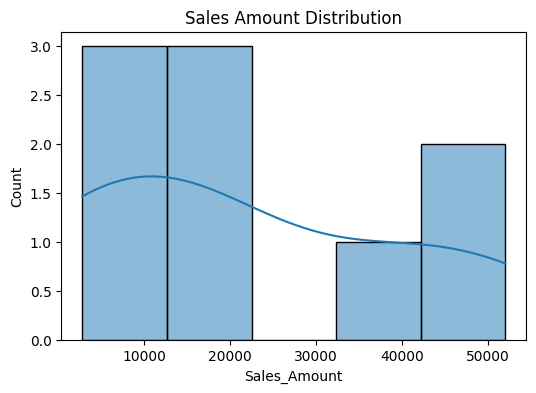

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df["Sales_Amount"], kde=True)
plt.title("Sales Amount Distribution")
plt.show()


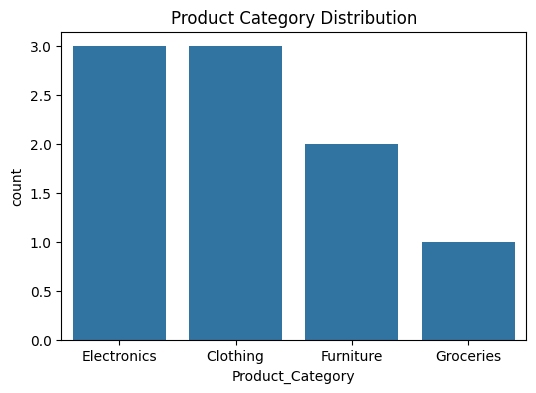

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x="Product_Category", data=df)
plt.title("Product Category Distribution")
plt.show()


In [15]:
import sqlite3

conn = sqlite3.connect("sales.db")
df.to_sql("sales", conn, if_exists="replace", index=False)


9

In [16]:
query1 = """
SELECT Product_Category,
       SUM(Sales_Amount) AS Total_Revenue
FROM sales
GROUP BY Product_Category
ORDER BY Total_Revenue DESC
LIMIT 5;
"""

pd.read_sql(query1, conn)


,Product_Category,Total_Revenue
0,Electronics,135000.0
1,Furniture,33000.0
2,Groceries,18105.0
3,Clothing,9100.0


In [17]:
query2 = """
SELECT substr(Purchase_Date,1,7) AS Month,
       SUM(Sales_Amount) AS Monthly_Sales
FROM sales
GROUP BY Month
ORDER BY Month;
"""

monthly_sales = pd.read_sql(query2, conn)
monthly_sales


,Month,Monthly_Sales
0,2024-01,122105.0
1,2024-02,73100.0


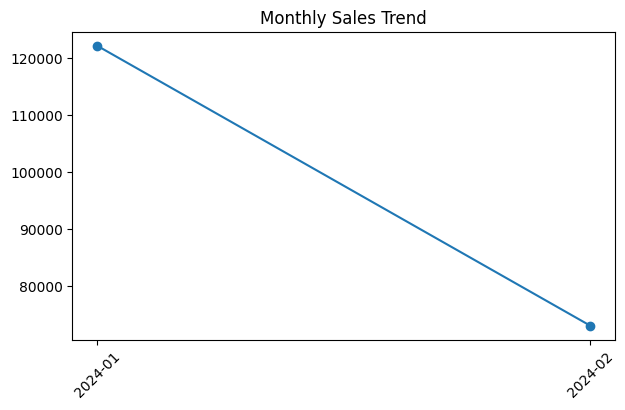

In [18]:
plt.figure(figsize=(7,4))
plt.plot(monthly_sales["Month"], monthly_sales["Monthly_Sales"], marker="o")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()


In [19]:
query3 = """
SELECT Payment_Mode,
       AVG(Sales_Amount) AS Avg_Sales
FROM sales
GROUP BY Payment_Mode;
"""

pd.read_sql(query3, conn)


,Payment_Mode,Avg_Sales
0,Cash,18105.000000
1,Credit Card,37333.333333
2,Debit Card,28000.000000
3,UPI,3033.333333


In [20]:
query4 = """
SELECT City,
       SUM(Sales_Amount) AS City_Sales
FROM sales
GROUP BY City
ORDER BY City_Sales DESC;
"""

pd.read_sql(query4, conn)


,City,City_Sales
0,Chennai,52000.0
1,Delhi,45000.0
2,Kolkata,41100.0
3,Mumbai,21200.0
4,Bangalore,18105.0
5,Ahmedabad,15000.0
6,Hyderabad,2800.0


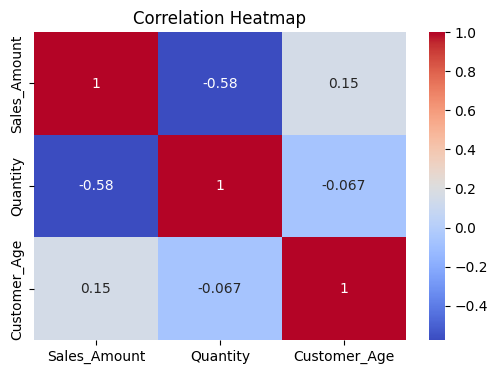

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["Sales_Amount","Quantity","Customer_Age"]].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


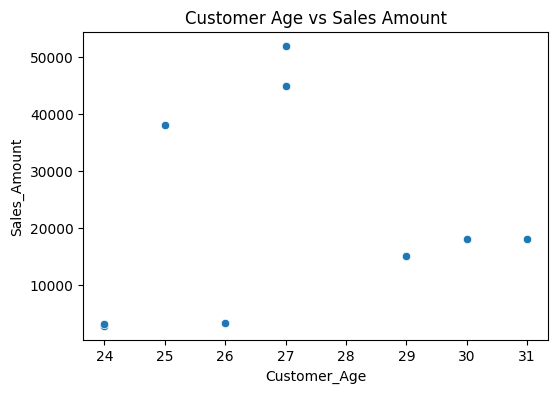

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Customer_Age", y="Sales_Amount", data=df)
plt.title("Customer Age vs Sales Amount")
plt.show()


In [24]:
### Key Insights from EDA:
- Electronics category contributes the highest revenue.
- Monthly sales show an increasing trend.
- Credit Card payments have higher average sales.
- Customer age shows moderate correlation with sales amount.


SyntaxError: invalid syntax (1441642399.py, line 2)